In [33]:
import pandas as pd
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [34]:
# Die Infos zu ausgewählten Ländern werden geladen. 
df = pd.read_csv('länderübersicht.csv', index_col='index')
selection = ['Schweiz', 'Frankreich', 'Vereinigte Staaten', 'Afghanistan', 'Albanien', 'Algerien', 'Japan', 'Jordanien', 'Niederlande', 'Griechenland']
df_sel = df.loc[selection]

In [35]:
# Eine Liste mit Wörtern, die nicht angezeigt werden sollen, wird generiert. 
stopw = list(set(stopwords.words('german')))
stopw.append('dass')

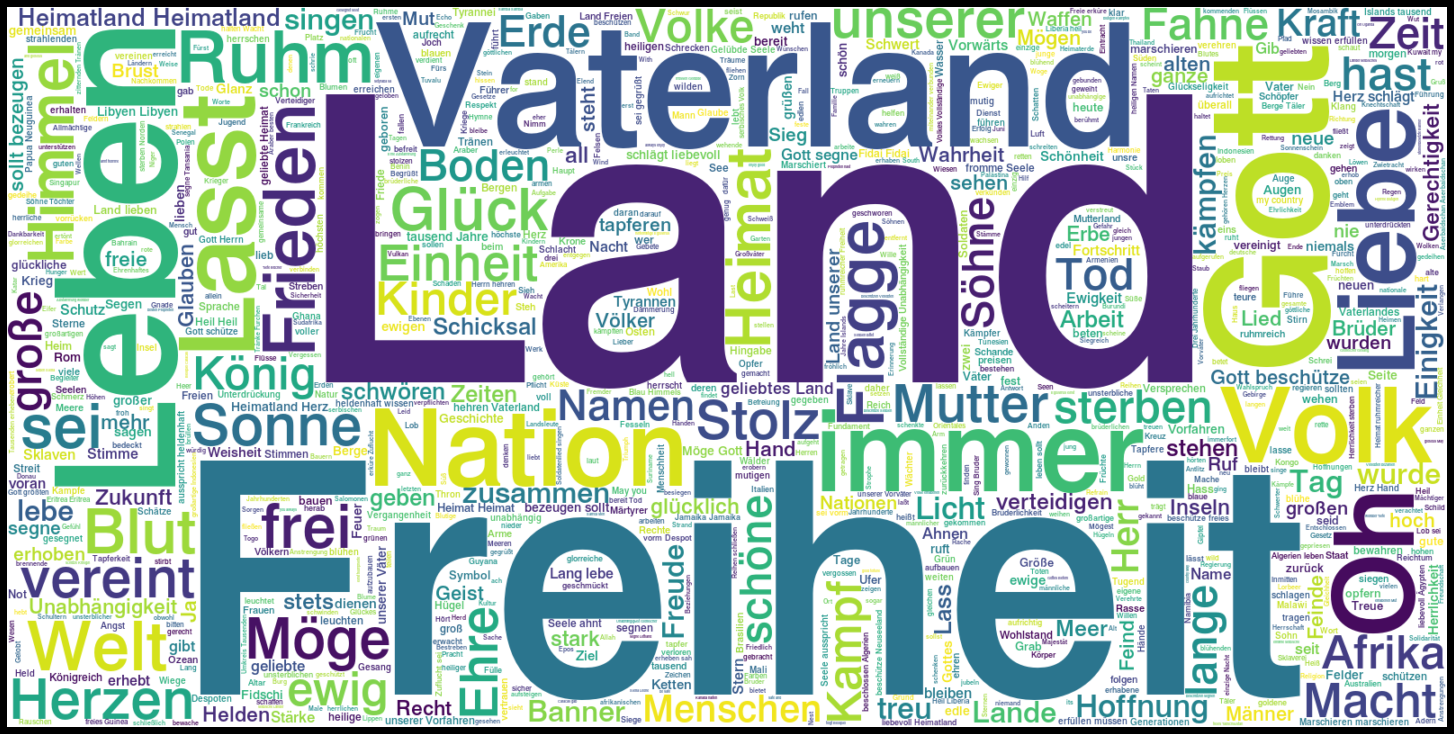

In [36]:
# Eine Wortwolke für alle Staaten zusammen wird generiert. 
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

lt = df['liedtext'].dropna().sum()

wc = WordCloud(width=1600, height=800, background_color='white', font_path='../../../fonts/Newhouse DT/Newhouse DT Medium_not hinted.otf', 
               max_words=2400, stopwords=stopw, random_state=1).generate(lt)

# create coloring from image
plt.figure(figsize=[20,20], facecolor='k')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('output/welt.jpg', dpi=400)
plt.show()

Schweiz


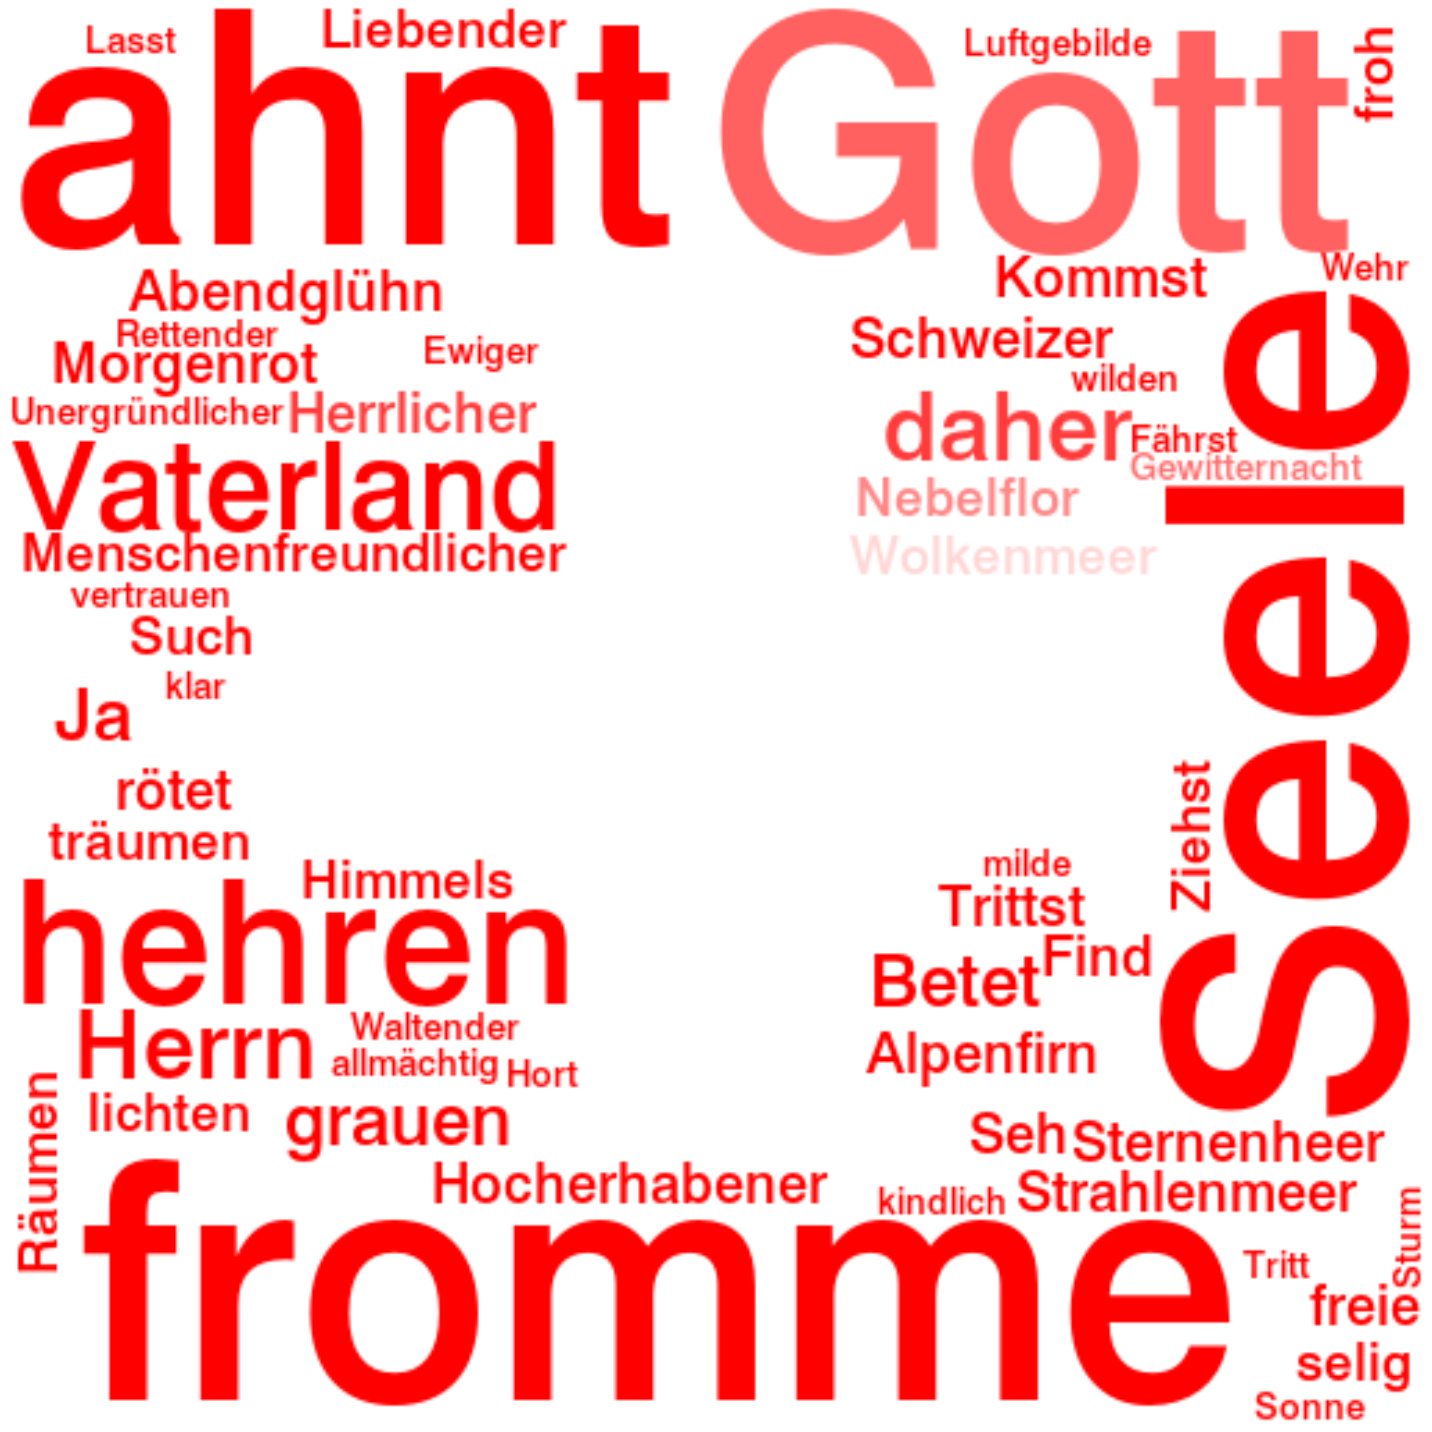

Frankreich


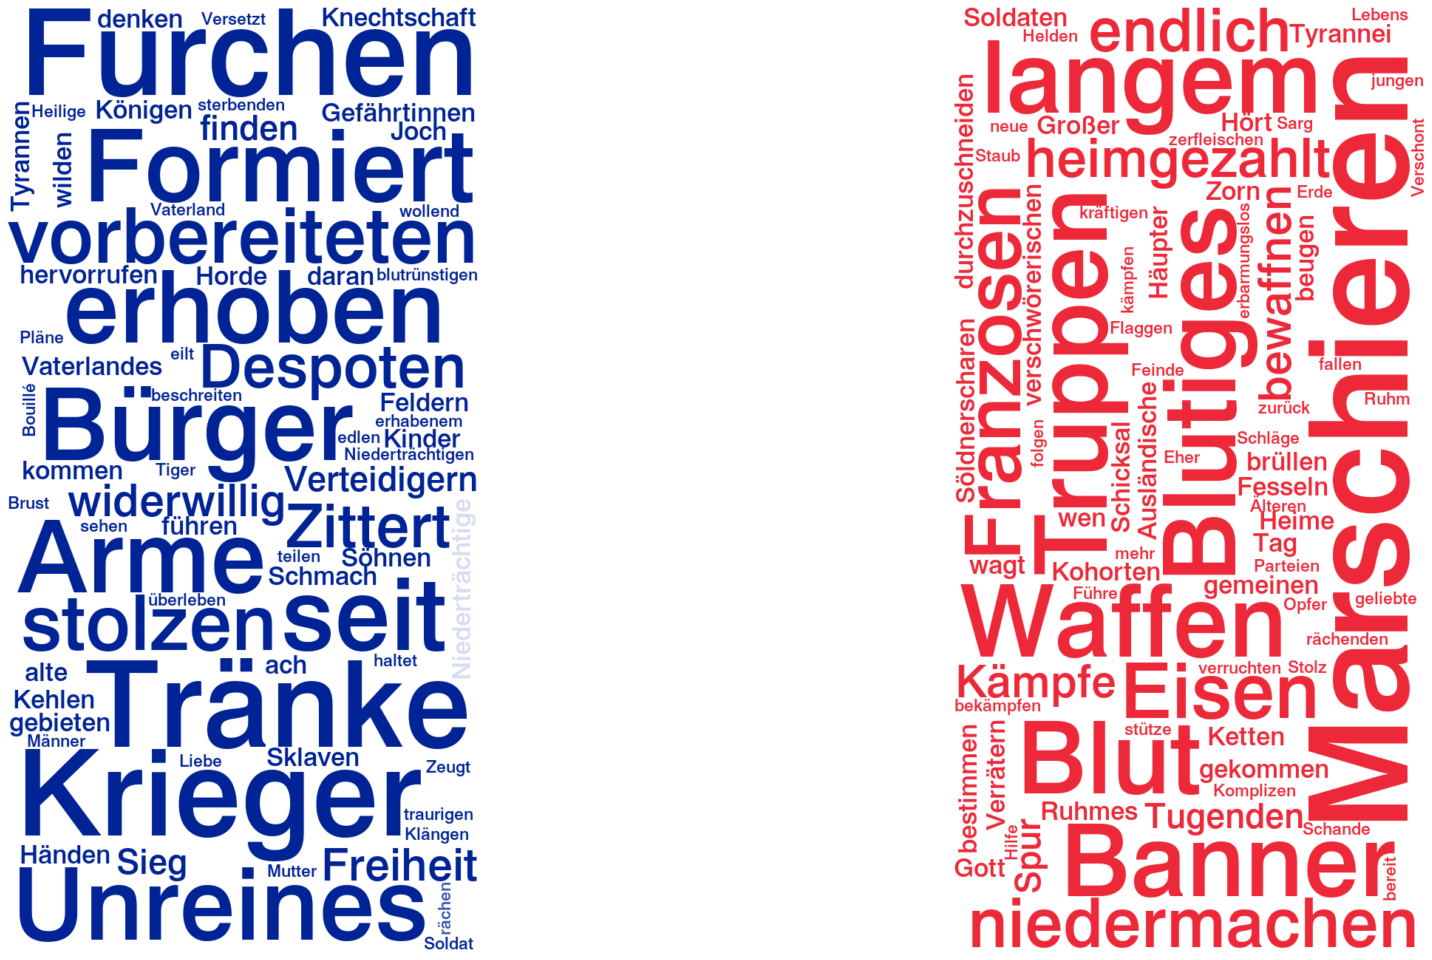

Vereinigte Staaten


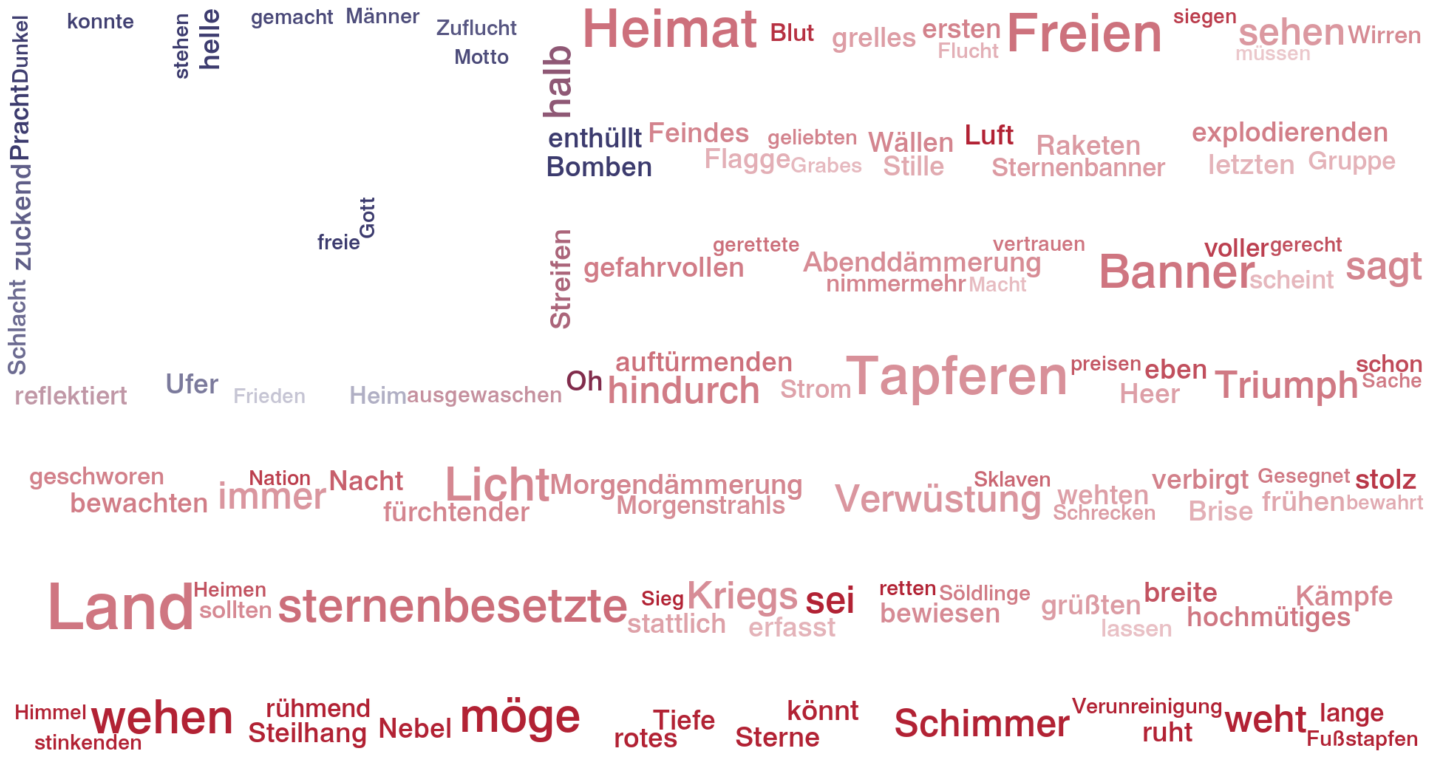

Afghanistan


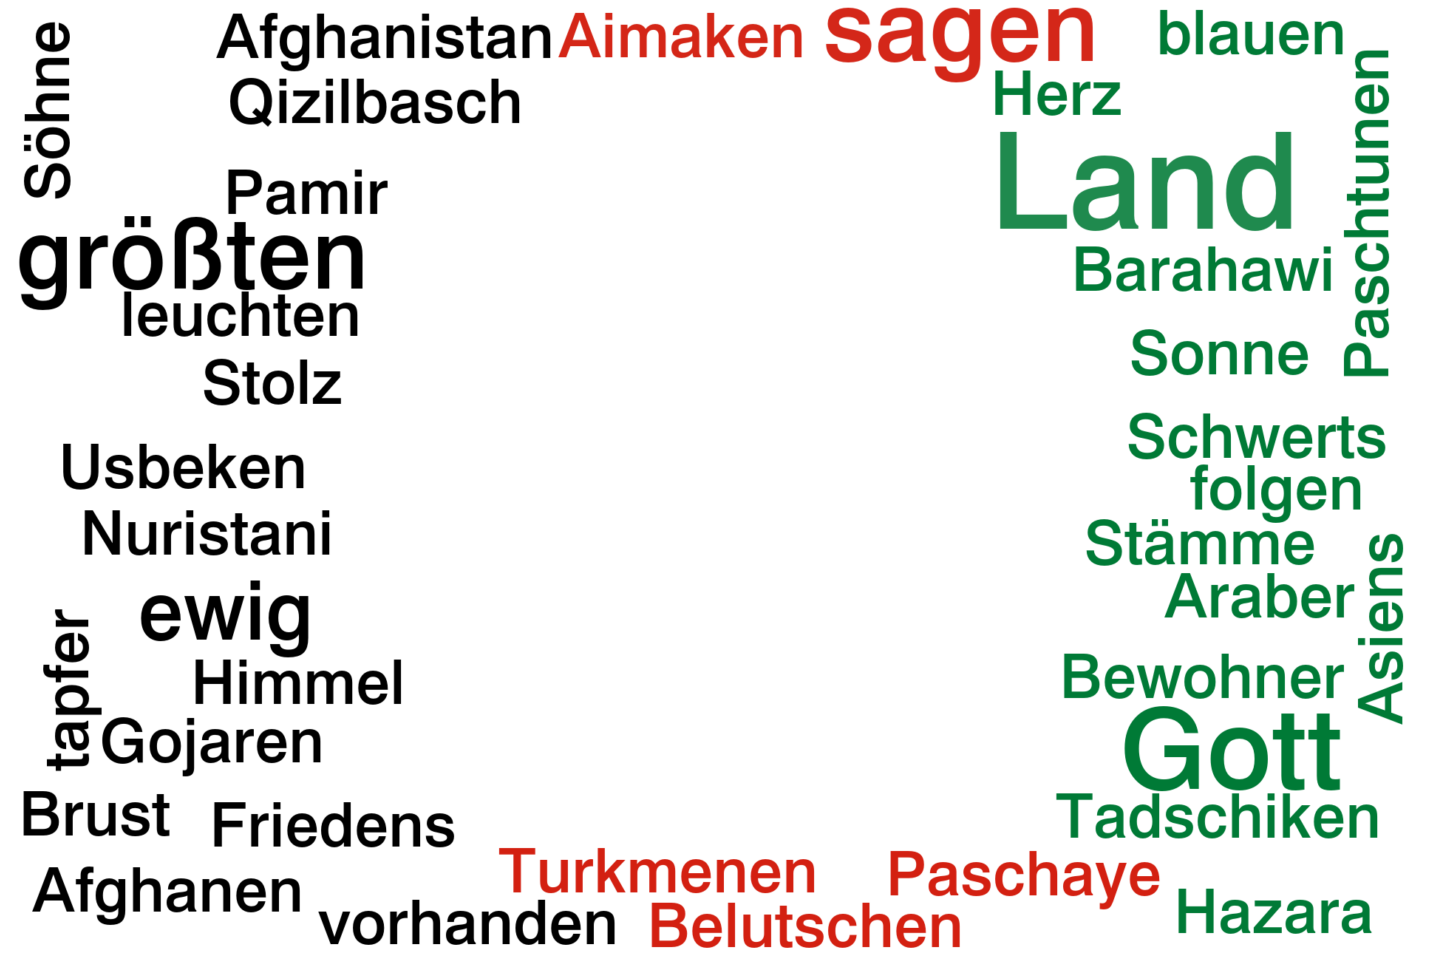

Albanien


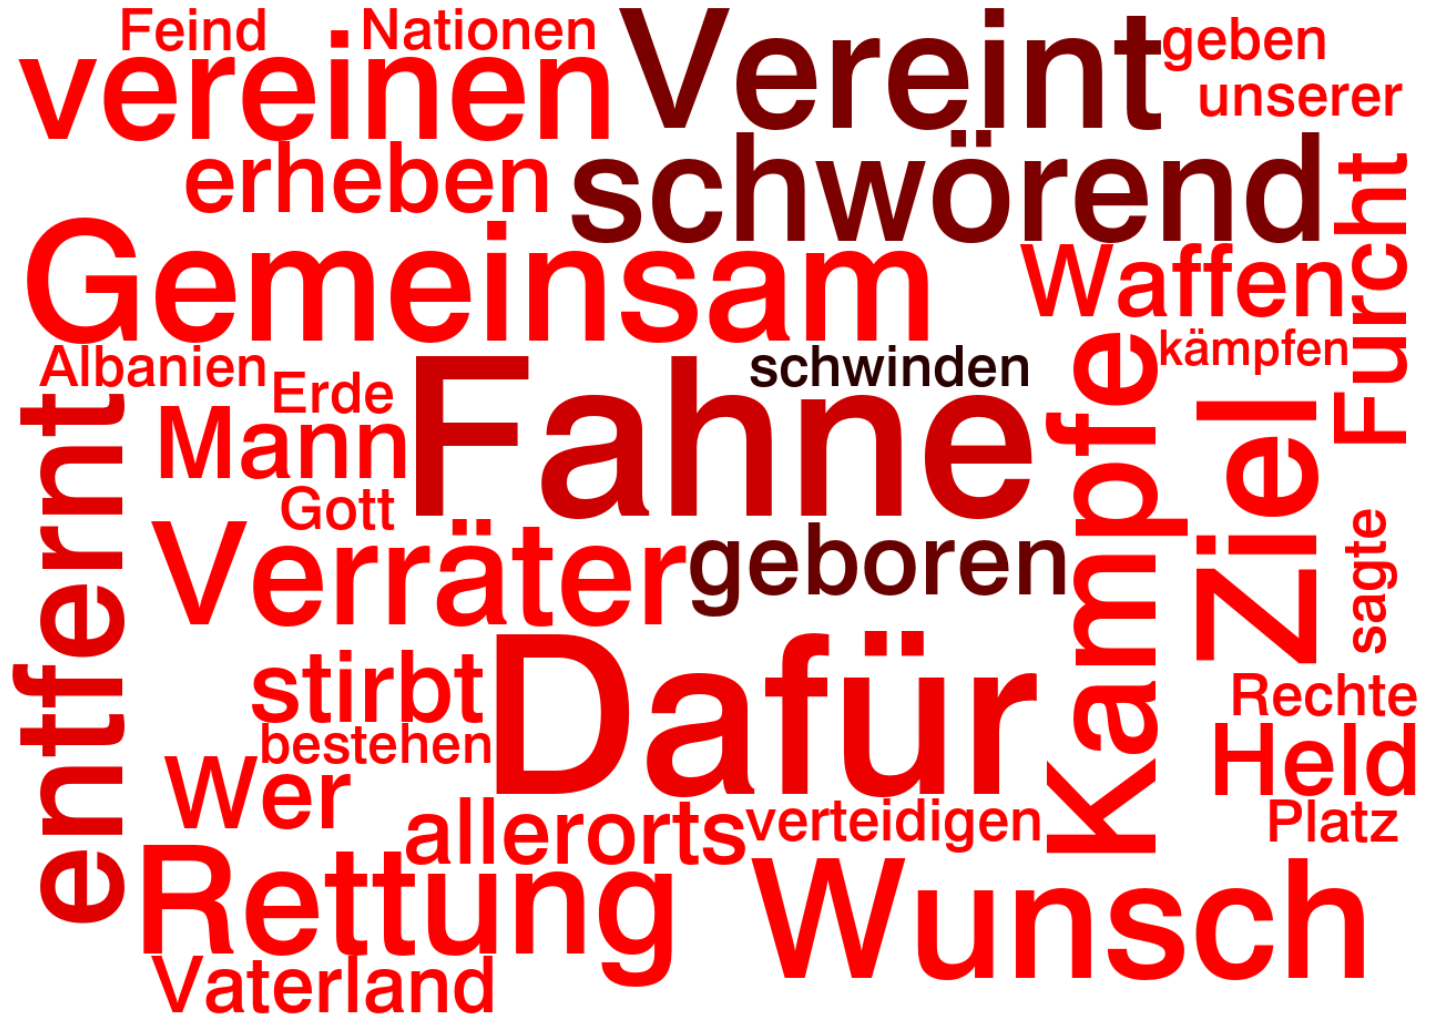

Algerien


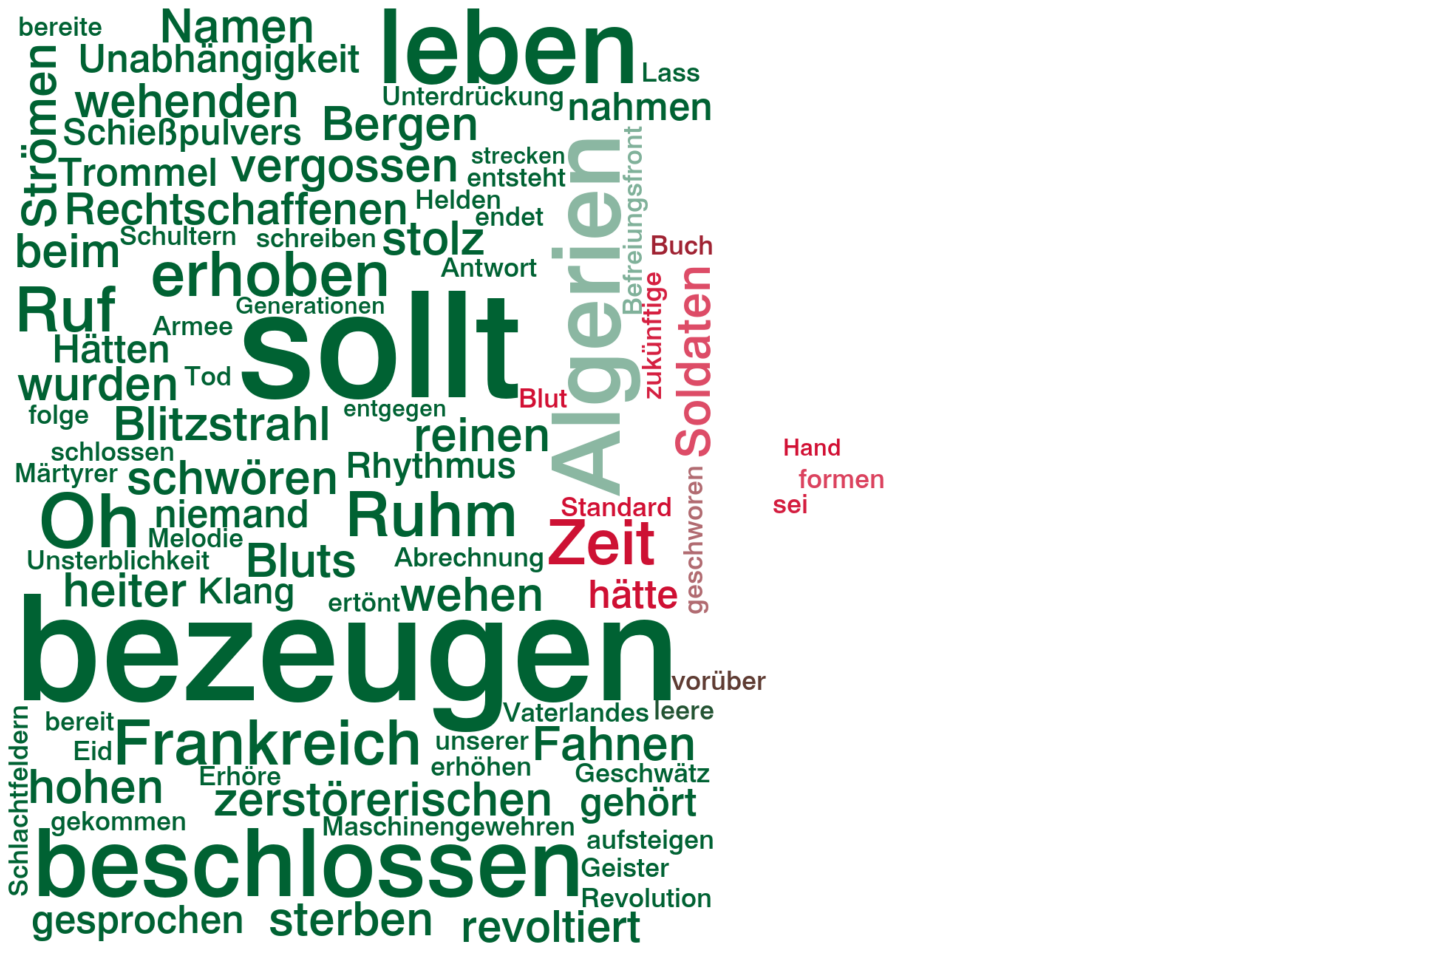

Japan


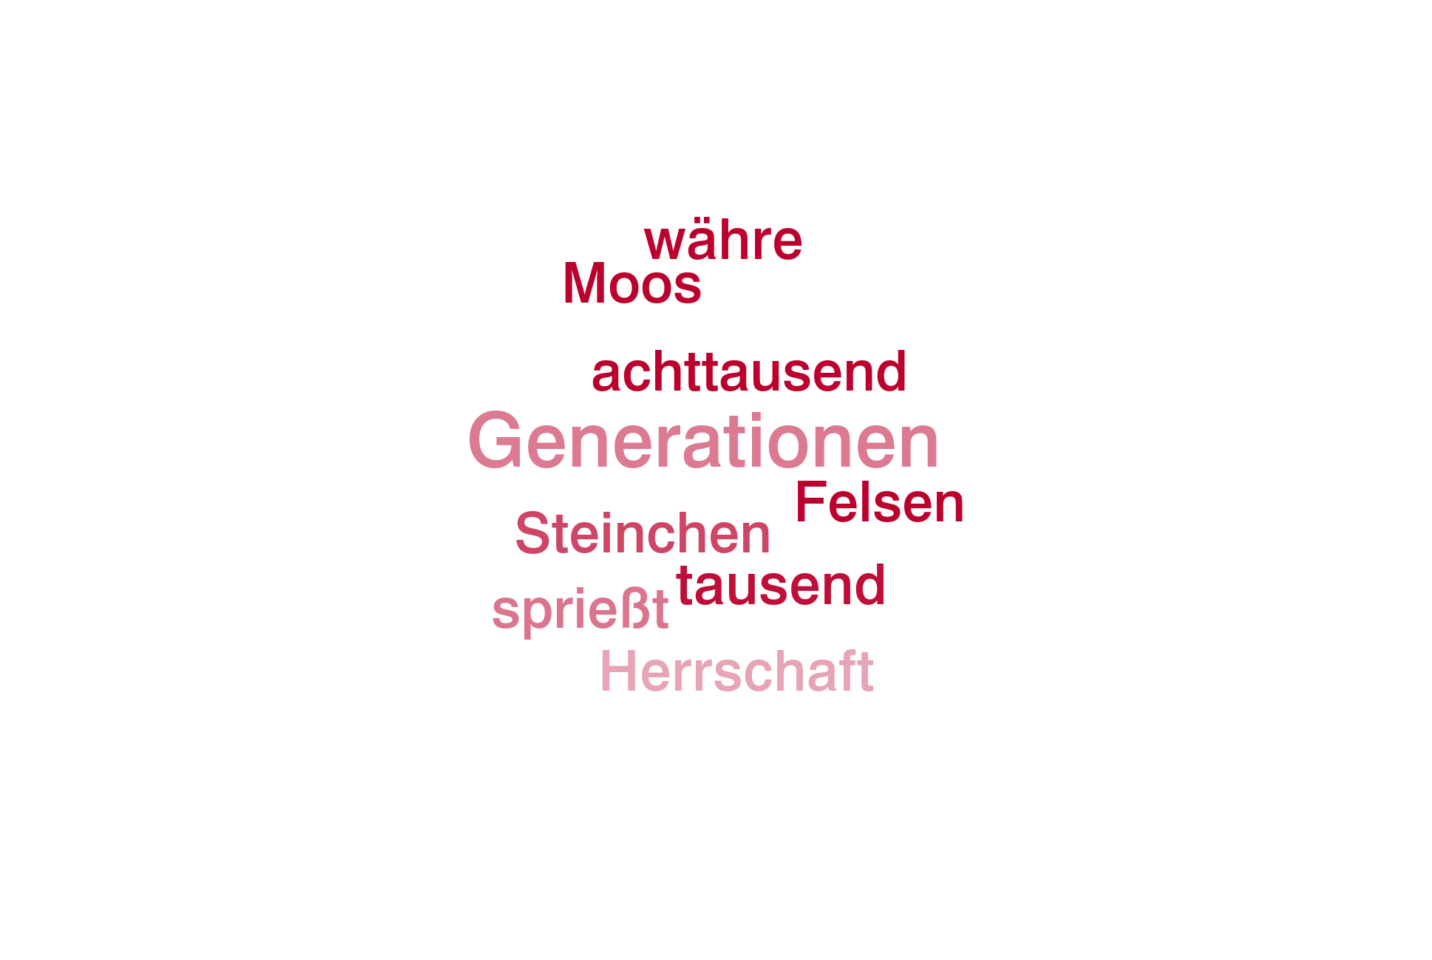

Jordanien


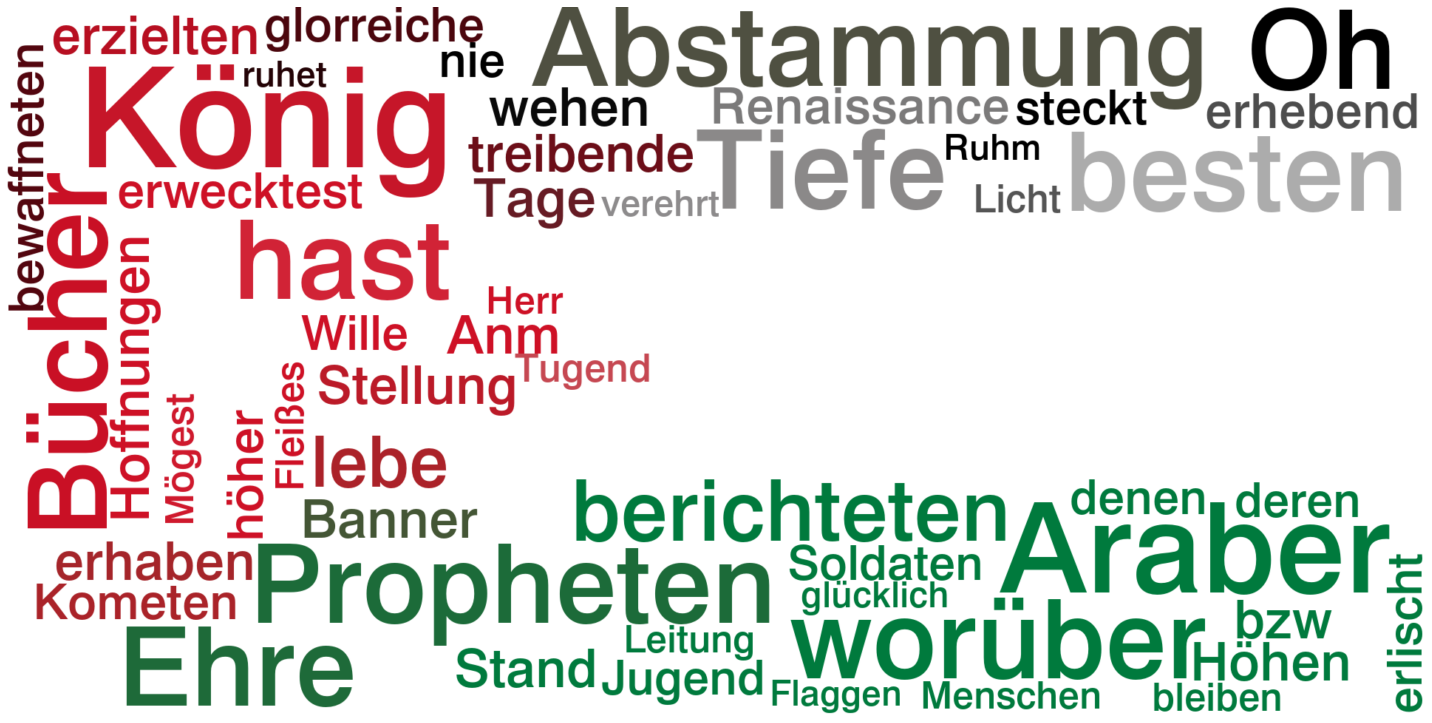

Niederlande


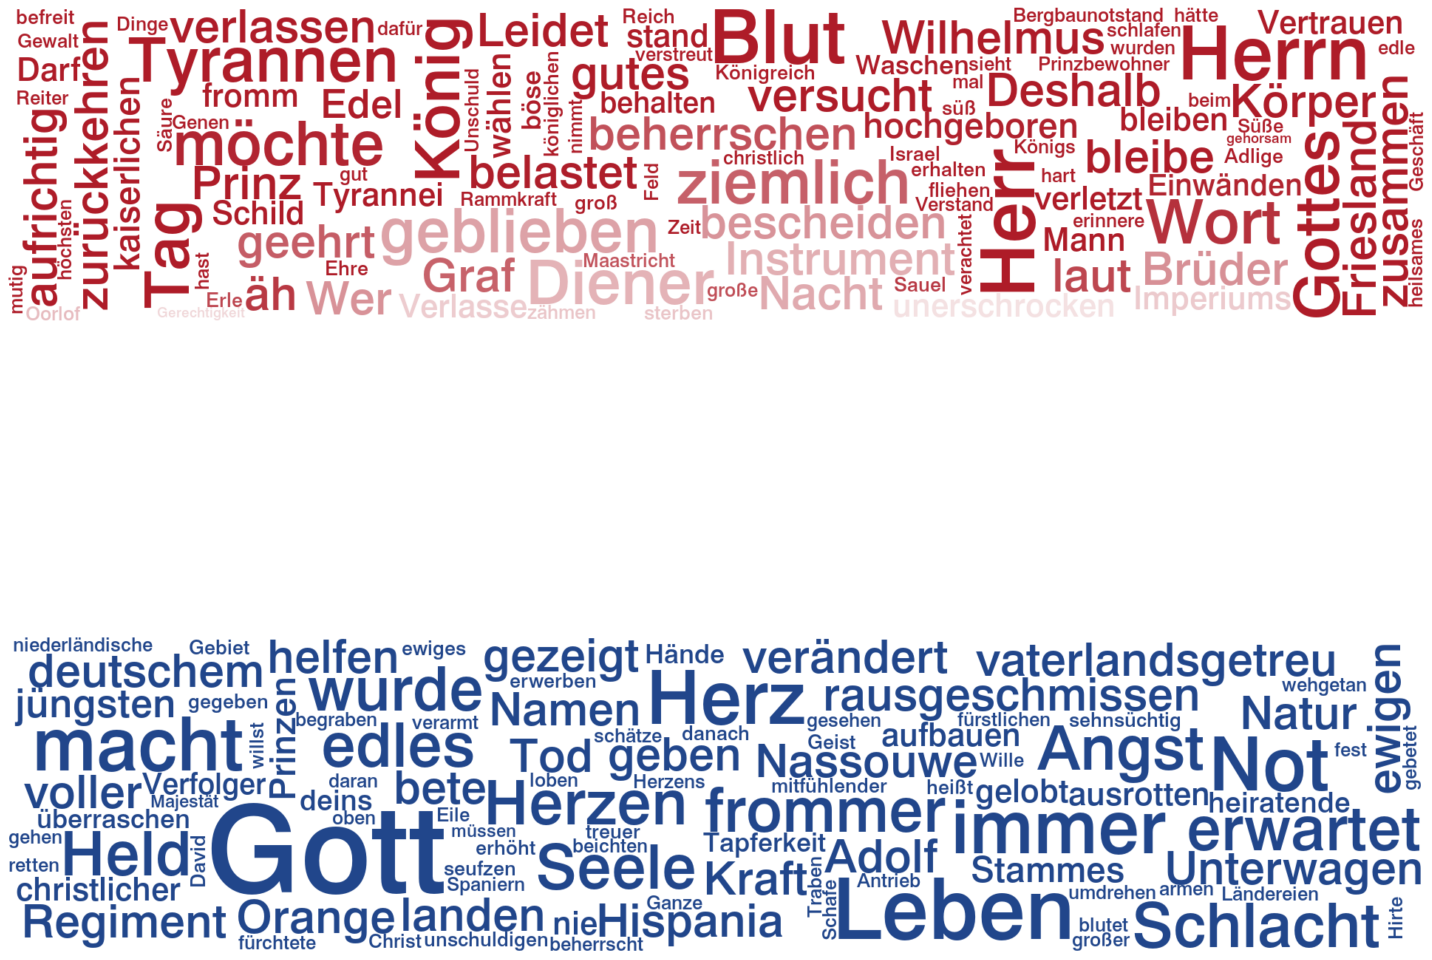

Griechenland


FileNotFoundError: [Errno 2] No such file or directory: '/home/this/Dokumente/bz/datendesk/morgenteam/2019-07_nationalhymnen/flaggen/Griechenland.png'

In [43]:
# Eine Wortwolke in Flaggenfarben für jeden ausgewählten Staat wird produziert. 
for index, row in df_sel.iterrows():
    print(index)
    with open('daten/' + row['text'], 'r') as f:
        lt = f.read()
        
    # get data directory (using getcwd() is needed to support running example in generated IPython notebook)
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

    # Einlesen der Länderflagge
    bimg = Image.open(path.join(d, 'flaggen/' + index + '.png'))
    bimg = bimg.convert('RGB')
    mask = np.array(bimg)

    wc = WordCloud(background_color='white', font_path='../../../fonts/Newhouse DT/Newhouse DT Medium_not hinted.otf', 
                   collocations=False, max_words=1200, mask=mask, normalize_plurals=False, 
                   stopwords=stopwords, relative_scaling=0.5, random_state=1).generate(lt)
    image_colors = ImageColorGenerator(mask)

    # create coloring from image
    plt.figure(figsize=[20,20])
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig('output/' + index.lower() + '.jpg', dpi=200)
    plt.show()